## Support material for the practical session on the psychometric function.

In this script, we will :
- simulate psychophysical data using the psychometric function
- fit the psychometric function to data
- evaluate goodness-of-fit of the model

In [1]:
# Load the necessary packages
import scipy as sp
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Condition: While being watched')

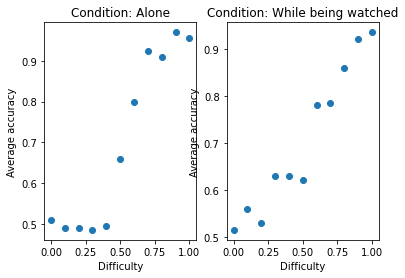

In [2]:
# Imagine an experiment in which you have to decide whether dots are moving towards the left or right side of the screen
# There are 11 difficulty levels, running from 0 (= all dots are moving completely ad random) to 1 (= all dots are moving equally)
# Let's create a variable x reflecting these 11 levels 
x = np.linspace(0, 1,num=11)

# Within each block, there were 200 trials. Let's create a variable ntrials that reflects this
ntrials = np.repeat(200,len(x))

# There are two conditions: A) people do the experimenta alone, B) while being watched by the experimenter.
# Below, you can find average accuracy for each level of x, seperately for condition A and B
y_A = np.array([0.51 , 0.49 , 0.49 , 0.485, 0.495, 0.66 , 0.8  , 0.925, 0.91 , 0.97 , 0.955])
y_B = np.array([0.515, 0.56 , 0.53 , 0.63 , 0.63 , 0.62 , 0.78 , 0.785, 0.86 , 0.92 , 0.935])

# Let's visualize these data to see how being watched influences performance
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.scatter(x, y_A)
ax1.set_xlabel("Difficulty")
ax1.set_ylabel("Average accuracy")
ax1.set_title("Condition: Alone")
ax2.scatter(x, y_B)
ax2.set_xlabel("Difficulty")
ax2.set_ylabel("Average accuracy")
ax2.set_title("Condition: While being watched")

**Q1.** Describe in your own words what is different between both conditions

**Q2.** Which of the four parameters of the psychometric function (slope, intercept, lapse, guess) do you think is different here? Why?

Next, instead of guessing, we'll try to actually fit a psychometric function to both these patterns.

To do so, we'll define a function that generates data based on the psychometric funtion:

In [3]:
def psychometric(x,guess,lapse,alpha,beta):
    F = sp.stats.norm.cdf(x,alpha,beta)
    p_correct = guess + (1 - guess - lapse) * F
    return(p_correct)

**Q3**: describe what each line in this function does (tip, inspect the help file like this: ?sp.stats.norm.cdf )

In [4]:
?sp.stats.norm.cdf

**Q4**: let's play around a bit with this function, change each of the parameters and interpret what you see:
1.  what happens if you increase/decrease guess?
2.  what happens if you increase/decrease lapse?
3.  what happens if you increase/decrease alpha?
4.  what happens if you increase/decrease beta?

Text(0, 0.5, 'Average accuracy')

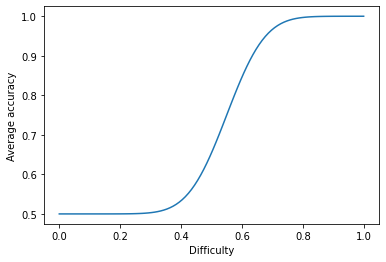

In [7]:
x_temp = np.linspace(0, 1,num=100) #
y_temp = psychometric(x_temp,guess=.5,lapse= 0, alpha= .55, beta=.1)
plt.plot(x_temp,y_temp)
plt.xlabel('Difficulty')
plt.ylabel('Average accuracy')